# MNIST Handwritten Digit Classification with Custom Neural Network

THIS NOTEBOOK IS STILL IN DEVELOPMENT! The final version will be released in due course.

Currently using this notebook to test the framework as I develop!
Feel free to experiment in here for now! :)

In [1]:
# import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from NeuralNetwork import NeuralNetwork
from NetworkConfigHandler import NetworkConfigHandler
from PreProcessor import PreProcessor
from DataHandler import DataHandler
from ActivationFunctions import ActivationFunctions

In [2]:
mnist_train = '../data/mnist_data/mnist_train.csv'
mnist_test = '../data/mnist_data/mnist_test.csv'

In [3]:
# get datasets
delimiter = ','
features = [f'pixel_{i}' for i in range(784)]
targets = ['id']
column_names = targets + features

In [4]:
train_df = PreProcessor.load_data(mnist_train, column_names=column_names)
test_df = PreProcessor.load_data(mnist_test, column_names=column_names)

Reading data from ../data/mnist_data/mnist_train.csv
Reading data from ../data/mnist_data/mnist_test.csv


In [5]:
train_df

,id,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df

,id,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create train-validation split

In [7]:
# use 40% of the training set for testing the framework 
# remove the line below to use the full training set 
train_df = train_df.sample(frac=.4)

train_df, val_df = PreProcessor.split_dataset(train_df, 0.2, seed=42)
train_df.shape, val_df.shape

((19200, 785), (4800, 785))

In [8]:
X_train = PreProcessor.normalize_dataset(train_df.loc[:, features].to_numpy())
y_train = train_df.loc[:, targets].to_numpy()

X_val = PreProcessor.normalize_dataset(val_df.loc[:, features].to_numpy())
y_val = val_df.loc[:, targets].to_numpy()

X_test = PreProcessor.normalize_dataset(test_df.loc[:, features].to_numpy())
y_test = test_df.loc[:, targets].to_numpy()

### Encode targets

In [9]:
encoder = OneHotEncoder(sparse=False)
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))

y_val_one_hot = encoder.transform(y_val.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))

In [10]:
y_train[0], y_train_one_hot[0], y_train_one_hot.shape

(array([0]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), (19200, 10))

In [11]:
def plot_digit(digit, label=None):
    plt.imshow(digit.reshape(28, 28), cmap='gray')
    if label != None:
        plt.title(f'Digit: {label}')
    plt.show()

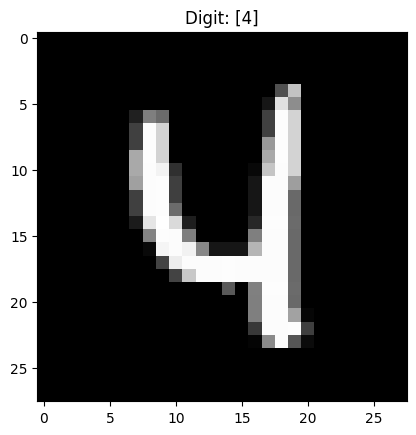

In [12]:
idx = 5
plot_digit(X_train[idx], y_train[idx])

### Create Input Data Pipeline with DataHandler

In [13]:
train_ds = DataHandler(X_train, y_train_one_hot)
val_ds = DataHandler(X_val, y_val_one_hot)
test_ds = DataHandler(X_test, y_test_one_hot)

In [14]:
print(train_ds.X.shape, train_ds.y.shape)
print(val_ds.X.shape, val_ds.y.shape)
print(test_ds.X.shape, test_ds.y.shape)

(19200, 784) (19200, 10)
(4800, 784) (4800, 10)
(10000, 784) (10000, 10)


# Build Neural Network

In [15]:
# initialise neural network parameters
n = len(features)
alpha = 20
model_config = [
    {'units': n, 'activation': 'input'},
    {'units': 512, 'activation': 'leaky_relu'},
    {'units': 256, 'activation': 'leaky_relu'},
    {'units': 10, 'activation': 'sigmoid'}
]

In [16]:
# construct neural network
model = NeuralNetwork(model_config, alpha)

In [17]:
x_t, y_t = train_ds[idx]
x_t, y_t = x_t.reshape(-1, 1), y_t.reshape(-1, 1)
x_t.shape, y_t.shape

((784, 1), (10, 1))

In [18]:
y_pred = model(x_t)
y_pred

/home/jansen/Documents/MachineLearning/Neural_Networks/GitHub/Vectorized-Neural-Network/src/ActivationFunctions.py:63: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-1*z)))


array([[1.00000000e+000],
       [1.00000000e+000],
       [1.00000000e+000],
       [1.22659880e-066],
       [0.00000000e+000],
       [2.32825904e-200],
       [1.00000000e+000],
       [1.00000000e+000],
       [1.00000000e+000],
       [0.00000000e+000]])

In [19]:
#train neural network
epochs = 2
model.fit(train_ds, val_ds, epochs)
# NN.evaluate(X_test, y_test)

Data received -> Training initiated...
Epoch 1/2


100%|██████████| 19200/19200 [01:52<00:00, 170.23it/s]


cost: 9.260225			val_cost: 8.831652
accuracy: 0.724531		val_accuracy: 0.781667
-------------------------------------------------
Epoch 2/2


100%|██████████| 19200/19200 [01:47<00:00, 178.66it/s]


cost: 9.19491			val_cost: 9.282473
accuracy: 0.777656		val_accuracy: 0.796458
-------------------------------------------------


In [20]:
x_t, y_t = train_ds[idx]
x_t, y_t = x_t.reshape(-1, 1), y_t.reshape(-1, 1)
x_t.shape, y_t.shape

((784, 1), (10, 1))

In [21]:
y_pred = model(x_t)
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [23]:
model.evaluate(test_ds)

(9.282104888912075, 0.8118)

In [29]:
def display_digits(neural_network, X_data, y_data, img_count):
    fig = plt.figure(figsize=(14, 14))

    for i in range(1, img_count + 1):
        img = np.reshape(X_data[i - 1], (np.shape(X_data[i - 1])[0], 1))
        id = y_data[i - 1]
        
        output = neural_network.forward_propagate(img)
        prediction = np.argmax(output, axis=0)

        prob = output[int(prediction)]
        pixels = img.reshape((28, 28))
        plt.subplot(4, 5, i)
        
        plt.imshow(pixels, cmap='gray')
        plt.title(f'True Label: {id}')
        plt.xlabel(f'NN prediction: {prediction}\nProbability: {round(prob[0], 3)}') 

    plt.subplots_adjust(wspace=0.9, hspace=0.9)
    plt.show()

/home/jansen/Documents/MachineLearning/Neural_Networks/GitHub/Vectorized-Neural-Network/src/ActivationFunctions.py:63: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-1*z)))


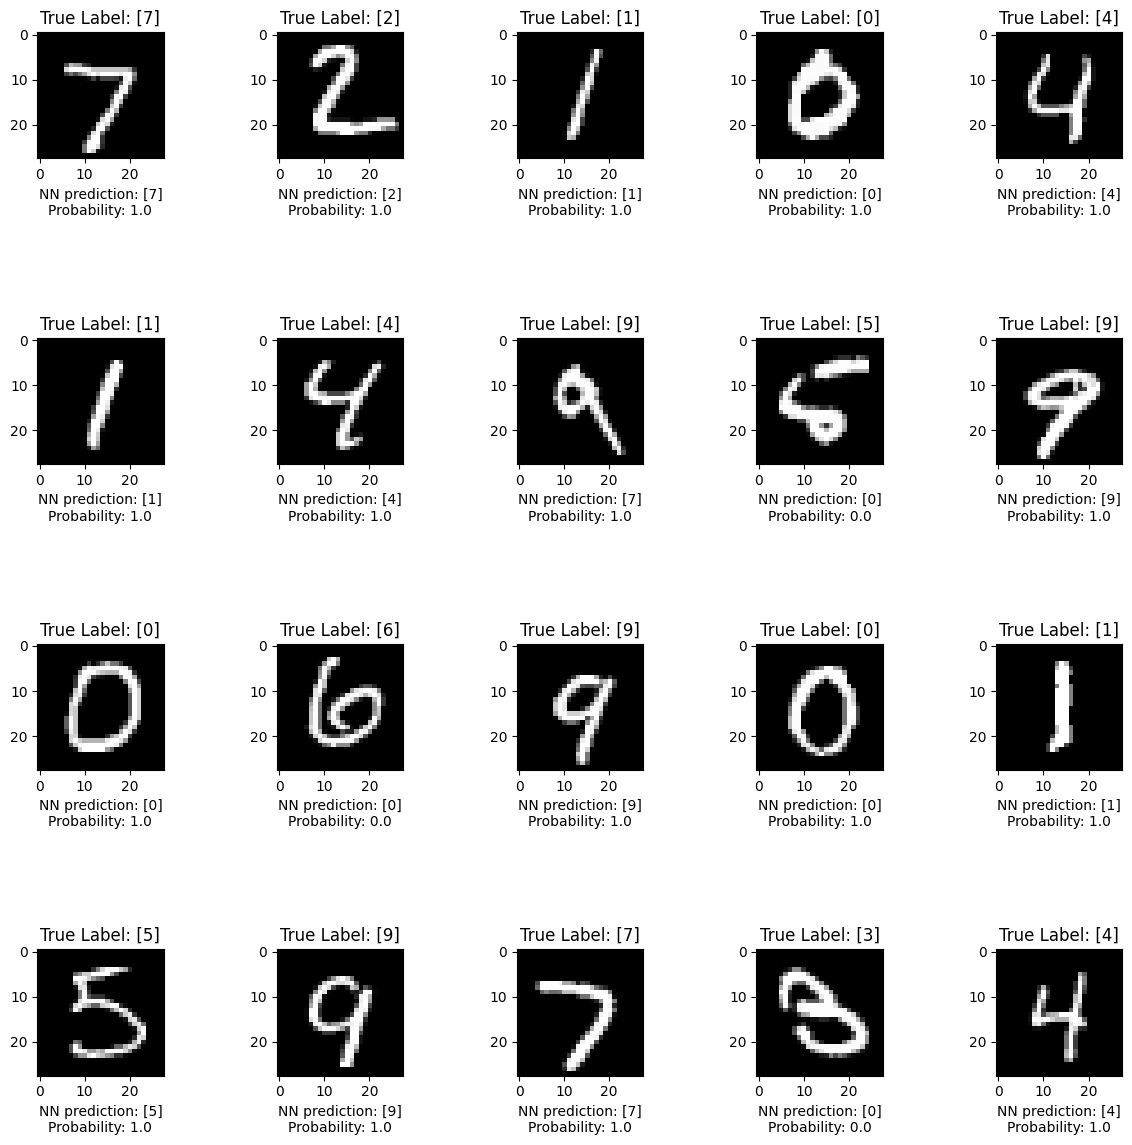

In [31]:
display_digits(model, X_test, y_test, 20)